In [44]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
type(X_train), type(y_train), type(X_test), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
y_train[0]

9

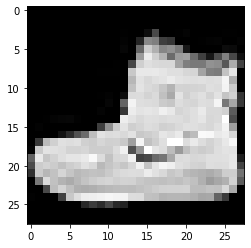

In [33]:
plt.imshow(X_train[0, :, :], cmap='gray')

In [34]:
np.unique(y_train), np.unique(y_test) 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [35]:
len(np.unique(X_train))

256

In [36]:
X_train.min(), X_train.max(), X_test.min(), X_test.max()

(0, 255, 0, 255)

In [37]:
X_train = X_train.reshape(60000, 784)
X_test  = X_test.reshape(10000, 784)

In [39]:
X_train = X_train / 255.0
X_test  = X_test / 255.0

In [41]:
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

In [43]:
y_train[0, :]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [48]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(784,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [51]:
model.fit(
    X_train, y_train,    
    epochs=10,
    verbose=1
)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6394 - accuracy: 0.7780
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3719 - accuracy: 0.8630
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3341 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3107 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2895 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2838 - accuracy: 0.8946
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2670 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2544 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2484 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.235

In [52]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3307 - accuracy: 0.8805


[0.3306522071361542, 0.8805000185966492]